In [0]:
# importing the necessary libraries and the MNIST dataset 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data 

In [0]:
mnist = input_data.read_data_sets("MNIST_data") 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


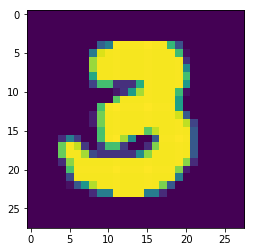

In [0]:
import PIL.Image as pil
testImage = (np.array(mnist.test.images[200], dtype='float')).reshape(28,28)
img = pil.fromarray(np.uint8(testImage * 255) , 'L')
plt.imshow(img)
img.show()

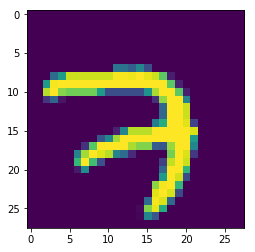

In [0]:
import PIL.Image as pil
testImage = (np.array(mnist.train.images[0], dtype='float')).reshape(28,28)
img = pil.fromarray(np.uint8(testImage * 255) , 'L')
plt.imshow(img)
img.show()

##### Both the networks have two hidden layers 
##### fully connected layers defining the  
##### Generator network function 

In [0]:
def generator(z, reuse = None): 
    with tf.variable_scope('gen', reuse = reuse): 
        hidden1 = tf.layers.dense(inputs = z, units = 128,  
                            activation = tf.nn.leaky_relu) 
                              
        hidden2 = tf.layers.dense(inputs = hidden1, 
           units = 128, activation = tf.nn.leaky_relu) 
             
        output = tf.layers.dense(inputs = hidden2,  
             units = 784, activation = tf.nn.tanh) 
          
        return output

In [0]:
# defining the Discriminator network function  
def discriminator(X, reuse = None): 
    with tf.variable_scope('dis', reuse = reuse): 
        hidden1 = tf.layers.dense(inputs = X, units = 128, 
                            activation = tf.nn.leaky_relu) 
                              
        hidden2 = tf.layers.dense(inputs = hidden1, 
               units = 128, activation = tf.nn.leaky_relu) 
                 
        logits = tf.layers.dense(hidden2, units = 1) 
        output = tf.sigmoid(logits) 
          
        return output, logits

In [0]:
# creating placeholders for the outputs 
tf.reset_default_graph() 
  
real_images = tf.placeholder(tf.float32, shape =[None, 784]) 
z = tf.placeholder(tf.float32, shape =[None, 100]) 
  
G = generator(z) 
D_output_real, D_logits_real = discriminator(real_images) 
D_output_fake, D_logits_fake = discriminator(G, reuse = True)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# defining the loss function 
def loss_func(logits_in, labels_in): 
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits( 
                          logits = logits_in, labels = labels_in)) 

In [0]:
# Smoothing for generalization 
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9) 
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real)) 
D_loss = D_real_loss + D_fake_loss 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [0]:
# defining the learning rate, batch size, 
# number of epochs and using the Adam optimizer 
lr = 0.001 # learning rate 
  

In [0]:
tvars = tf.trainable_variables()  
d_vars =[var for var in tvars if 'dis' in var.name] 
g_vars =[var for var in tvars if 'gen' in var.name] 

In [0]:
D_trainer = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list = d_vars) 
G_trainer = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list = g_vars) 
  

In [0]:
batch_size = 150 # batch size 
epochs = 2000 # number of epochs. The higher the better the result 
init = tf.global_variables_initializer()

In [0]:
# creating a session to train the networks 
samples =[] # generator examples 
  
with tf.Session() as sess: 
    sess.run(init) 
    for epoch in range(epochs): 
        num_batches = mnist.train.num_examples//batch_size 
          
        for i in range(num_batches): 
            batch = mnist.train.next_batch(batch_size) 
            batch_images = batch[0].reshape((batch_size, 784)) 
            batch_images = batch_images * 2-1
            batch_z = np.random.uniform(-1, 1, size =(batch_size, 100)) 
            _= sess.run(D_trainer, feed_dict ={real_images:batch_images, z:batch_z}) 
            _= sess.run(G_trainer, feed_dict ={z:batch_z}) 
              
        print("on epoch{}".format(epoch)) 
          
        sample_z = np.random.uniform(-1, 1, size =(1, 100)) 
        gen_sample = sess.run(generator(z, reuse = True), 
                                 feed_dict ={z:sample_z}) 
          
        samples.append(gen_sample)

on epoch0
on epoch1
on epoch2
on epoch3
on epoch4
on epoch5
on epoch6
on epoch7
on epoch8
on epoch9
on epoch10
on epoch11
on epoch12
on epoch13
on epoch14
on epoch15
on epoch16
on epoch17
on epoch18
on epoch19
on epoch20
on epoch21
on epoch22


KeyboardInterrupt: ignored

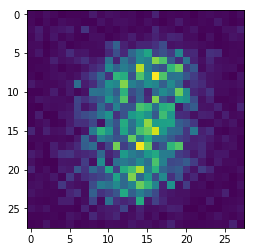

In [0]:
# result after 0th epoch 
plt.imshow(samples[0].reshape(28, 28)) 

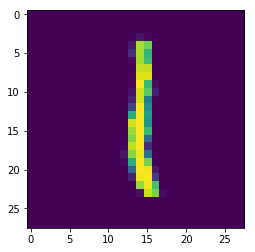

In [0]:
# result after 0th epoch 
plt.imshow(samples[4600].reshape(28, 28)) 

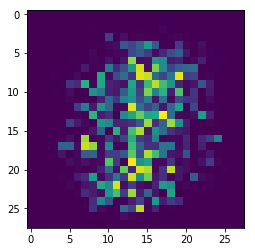

In [0]:
# result after 0th epoch 
plt.imshow(samples[100].reshape(28, 28)) 